## Category percentiles 

In [1]:
import pandas as pd
from siuba import *
import numpy as np

In [2]:
import _dla_utils
from shared_utils import altair_utils
from shared_utils import geography_utils
from shared_utils import calitp_color_palette as cp
from shared_utils import styleguide

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:79: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
E0329 18:44:04.718089042     966 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:79: UserWarning: Your application has auth

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df = pd.read_parquet('dla_df.parquet')

In [5]:
df.sample()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,process_days,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
17567,Obligated,ER,32L0(339),Santa Cruz County,2020-09-17,2020-09-22,2020-09-25,2020-11-04,2020-11-06,"109,178.00",0.00,"123,325.00",Authorized,5936,5,E-76 approved on,98.00,43.00,2.00,nan,In The County Of Santa Cruz On Highland Way Pm...,Stabilize Roadway And Place Over Side Drain,5,2020-06-16,2020-09-17,AMBAG,32L0,"2,020.00",143.00,Santa Cruz County,"129,118.76","114,307.14",0.00,0,0,0,1,0,1,0,2


### Add types

In [6]:
# from calitp.storage import get_fs
# fs = get_fs()

In [7]:
#info = pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/locodes_updated7122021.xlsx')

In [8]:
# info

In [10]:
group = (df>>count(_.primary_agency_name)>>arrange(_.n))

In [11]:
q33 = group.n.quantile(0.33).astype(float)
q66 = group.n.quantile(0.66).astype(float)

In [9]:
def fleet_size (row):
    if ((row.n > 0) and (row.n <= q33)):
        return "Small"
    elif ((row.n > q33) and (row.n <= q66)):
        return "Medium"
    elif ((row.n > q66)):
        return "Large"
    else:
        return "No Info"


In [12]:
group["agency_size"] = group.apply(lambda x: fleet_size(x), axis=1)

In [13]:
agency_map = dict(zip(group['primary_agency_name'], 
                          group['agency_size']))

In [14]:
df['agency_size'] = df['primary_agency_name'].map(agency_map)


In [15]:
df.sample()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,process_days,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories,agency_size
7749,Obligated,CML,5122(077),Porterville,2015-12-01,2015-12-01,2015-12-01,2015-12-04,2015-12-23,"-11,821.04",0.00,"-18,340.84",Authorized,5122,6,E-76 approved on Prepared on 10/6/2015,0.00,3.00,19.00,nan,Morton Ave From Hwy 65 To Westwood St,"Install Pavement, Curb, Gutter, Sidewalk",3,NaT,NaT,TCAG,5122,"2,015.00",22.00,Porterville,"-20,968.19","-13,514.42",0.00,1,0,0,1,0,1,0,3,Large


### testing with street

In [16]:
df1 = df>>filter(_.street==1)

In [17]:
df1.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,process_days,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories,agency_size
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,"5,680,921.00","5,702,041.00",Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,5924,"2,018.00",23.00,Sacramento County,"6,153,086.12",0.00,"6,130,295.48",0,0,0,1,0,0,0,1,Large
7,Obligated,CML,5143(030),Dinuba,2018-12-17,2018-12-19,2018-12-24,2018-12-27,2018-12-27,"320,000.00",0.00,"431,758.00",Authorized,5143,6,E-76 approved on,2.00,8.00,0.00,TUL10-010,Along Alta Ave A (road 80) From Kamm Ave (ave ...,Signal Synchronization,2,2018-11-21,2018-12-17,TCAG,5143,"2,018.00",10.00,Dinuba,"465,911.09","345,312.77",0.00,0,0,0,1,0,0,0,1,Medium
8,Obligated,HSIPLN,5370(025),Arvin,2018-10-11,2018-12-21,2018-12-27,2018-12-27,2018-12-27,"-498,175.00",0.00,"320,137.00",Authorized,5370,6,E-76 approved on,1.00,6.00,0.00,KER140601,Intersection Of Sr 223 And Derby Street,Traffic Signalization (tc),3,2018-10-10,2018-12-20,KCOG,5370,"2,018.00",7.00,Arvin,"345,460.60","-537,581.84",0.00,0,0,0,1,0,0,0,1,Medium
9,Obligated,STPL,5060(259),Fresno,2018-10-29,2018-10-29,2018-12-21,2018-12-27,2018-12-27,"-16,774.40",0.00,"10,919.60",Authorized,5060,6,E-76 approved on,NaN,59.00,0.00,FRE110622,Eaton Trail 1/4 Mile North Of Audubon Drive To...,Trail Resurfacing And Bridge Repair (tc),4,NaT,NaT,CFCG,5060,"2,018.00",NaN,Fresno,"11,783.37","-18,101.30",0.00,1,0,1,1,0,1,0,4,Large
11,Obligated,HSIPL,5378(045),Palmdale,2018-12-11,2018-12-18,2018-12-27,2018-12-27,2018-12-27,"545,800.00",0.00,"735,764.00",Authorized,5378,7,E-76 approved on,8.00,9.00,0.00,SCAG015,Various Locations Citywide.,Upgrade Guard Rail And End Treatments,2,2018-12-04,2018-12-10,SCAG,5378,"2,018.00",17.00,Palmdale,"793,964.70","588,974.09",0.00,0,1,0,1,0,0,0,2,Large


#### 99th Percentile

In [18]:
df1.adjusted_total_requested.quantile(0.99)

7189913.603728131

In [19]:
print(f'There are {len(df1>>filter(_.adjusted_total_requested>=7189913.6))} obligations in the 99th total_requested percentile, which is {len(df1>>filter(_.adjusted_total_requested>=7189913.6)>>count(_.primary_agency_name))} agencies')


There are 87 obligations in the 99th total_requested percentile, which is 59 agencies


In [20]:
len(df1>>filter(_.adjusted_total_requested>=7189913.6)>>count(_.primary_agency_name)>>arrange(-_.n))

59

In [21]:
(df1>>filter(_.adjusted_total_requested>=7189913.6)>>count(_.primary_agency_name)>>arrange(-_.n))

,primary_agency_name,n
21,Los Angeles,9
36,Sacramento County,4
45,San Jose,4
2,Bakersfield,3
32,Riverside,3
35,Sacramento,3
6,Caltrans,2
20,Long Beach,2
33,Riverside County Transportation Commission,2
37,Salinas,2


In [22]:
(df1>>filter(_.adjusted_total_requested>=7189913.6)>>count(_.agency_size)>>arrange(-_.n))

,agency_size,n
0,Large,67
1,Medium,18
2,Small,2


#### First Quantile

In [23]:
df1.adjusted_total_requested.quantile(0.1)

-104013.10008473495

In [24]:
len(df1.adjusted_total_requested<=-104013.1)

8626

In [25]:
(df1>>filter(_.adjusted_total_requested<=-104013.1)>>count(_.agency_size)>>arrange(-_.n))

,agency_size,n
0,Large,651
1,Medium,161
2,Small,51


In [26]:
(df1>>filter(_.adjusted_total_requested<=-104013.1)>>count(_.primary_agency_name)>>arrange(-_.n))

,primary_agency_name,n
120,Los Angeles,30
100,Kern County,26
10,Bakersfield,25
77,Fresno,19
216,San Joaquin County,17
...,...,...
275,Walnut,1
278,Watsonville,1
281,Whittier,1
283,Woodlake,1


### Grouping by Project Category

In [27]:
pcs = (
    df1
    >> group_by(_.primary_agency_name, _.project_no)
    >> summarize(sums = _.adjusted_total_requested.sum())
)

In [28]:
pcs

,primary_agency_name,project_no,sums
0,Alameda,5014(031),148.80
1,Alameda,5014(035),"39,772.45"
2,Alameda,5014(038),"896,939.34"
3,Alameda,5014(041),"1,476,713.41"
4,Alameda,5014(046),"691,704.64"
...,...,...,...
3327,Yucca Valley,5466(017),"-715,099.38"
3328,Yucca Valley,5466(019),"66,146.73"
3329,Yucca Valley,5466(021),"137,472.09"
3330,Yucca Valley,5466(022),"1,158,673.54"


In [29]:
#making sure the sums count all the same project numbers 
(
    df1
    >> group_by(_.primary_agency_name, _.project_no)
    >> count(_.project_no)
)

,primary_agency_name,project_no,n
0,Alameda,5014(031),1
1,Alameda,5014(035),1
2,Alameda,5014(038),2
3,Alameda,5014(041),4
4,Alameda,5014(046),2
...,...,...,...
3327,Yucca Valley,5466(017),1
3328,Yucca Valley,5466(019),3
3329,Yucca Valley,5466(021),3
3330,Yucca Valley,5466(022),4


In [30]:
df1>>filter(_.project_no==('5014(041)'))>>summarize(sums= _.adjusted_total_requested.sum())


,sums
0,"1,476,713.41"


In [31]:
pcs >> filter(_.sums <= -104013.1) >> count(_.primary_agency_name)>> arrange(-_.n)

,primary_agency_name,n
33,Los Angeles,12
39,Modesto,9
89,Stockton,8
73,San Joaquin County,6
1,Bakersfield,5
...,...,...
100,Walnut Creek,1
101,Wasco,1
103,Yuba City,1
104,Yuba County,1


* agencies with multiple project numbers still fall under the 1st percentile quantile (based on individual obligations)
* when grouped by project number, the number of agencies falls from 291 to 106

In [32]:
## checking the 99th percentile

len(pcs >> filter(_.sums >= 7189913.6) >> count(_.primary_agency_name) >> arrange(-_.n))

57

* for the 99th percentile, the numbers of agencies that in this category only falls by 2 when grouping by project numbers 

### Grouping By Organization

In [38]:
orgs = (
    df1
    >> group_by(_.primary_agency_name)
    >> summarize(sums = _.adjusted_total_requested.sum())
)

In [48]:
orgs.sums.quantile(0.05)

27875.24018021716

In [47]:
orgs.sums.quantile(0.95)

41481561.28856773

In [55]:
#filtering

In [56]:
len(orgs>>filter(_.sums <= 27875.2) >> count(_.primary_agency_name))

24

In [57]:
(orgs>>filter(_.sums <= 27875.2) >> count(_.primary_agency_name))

,primary_agency_name,n
0,Angels,1
1,Butte County Association of Governments,1
2,Cloverdale,1
3,Corcoran,1
4,Desert Hot Springs,1
5,El Segundo,1
6,"Golden Gate Bridge, Highway And Transportation...",1
7,Hesperia,1
8,Irvine,1
9,Lawndale,1


In [53]:
len(orgs>>filter(_.sums >= 41481561.3) >> count(_.primary_agency_name))

24

In [54]:
(orgs>>filter(_.sums >= 41481561.3) >> count(_.primary_agency_name))

,primary_agency_name,n
0,Bakersfield,1
1,Caltrans,1
2,Contra Costa County,1
3,Fresno,1
4,Kern County,1
5,Long Beach,1
6,Los Angeles,1
7,Los Angeles County,1
8,Los Angeles County Metropolitan Transportation...,1
9,Oakland,1


#### plotting distributions

In [33]:
import seaborn as sns

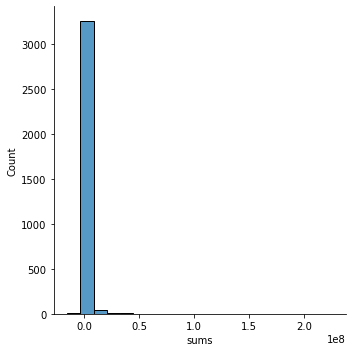

In [34]:
## FLAG: not running
sns.displot(pcs, x="sums", bins=20)

In [35]:
#import altair as alt

In [36]:
## runs error for too many rows
# alt.Chart(df1).mark_bar().encode(
#     alt.X("adjusted_total_requested:Q", bin=True),
#     y='count()',
# )